# Regression and Other Stories: Human Development Index

Human Development Index - Looking at data in different ways. See Chapter 2 in Regression and Other Stories.

---

### Load Packages 

In [1]:
using DataFrames, StatsPlots, CSV, HTTP, StatsBase, StatFiles, Statistics

### Load data

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/HDI/data/hdi.dat"
hdi = CSV.File(HTTP.get(data).body) |> DataFrame
first(hdi, 6)

,rank,state,hdi,canada.dist
,Int64,String,Float64,Int64
1,1,Connecticut,0.962,2
2,2,Massachusetts,0.961,2
3,3,New Jersey,0.961,2
4,4,"Washington, D.C.",0.96,4
5,5,Maryland,0.96,3
6,6,Hawaii,0.959,2


In [3]:
# Would be nice to not have to download the .dta file
votes = StatFiles.load("data/state vote and income, 68-00.dta") |> DataFrame
first(votes, 6)

,st_fips,st_year,st_state,st_stateabb,st_total,st_dem,st_rep,st_repshare
,Int8?,Int16?,String?,String?,Int16?,Int16?,Int16?,Float32?
1,1,1968,Alabama,AL,1050,197,147,0.427326
2,2,1968,Alaska,AK,83,35,38,0.520548
3,4,1968,Arizona,AZ,487,171,267,0.609589
4,5,1968,Arkansas,AR,610,185,189,0.505348
5,6,1968,California,CA,7252,3244,3468,0.516687
6,8,1968,Colorado,CO,811,335,409,0.549731


### Pre-process

In [4]:
income2000 = votes[votes.st_year .== 2000,:]
hdi_joined = leftjoin(income2000, hdi, on=:st_state=>:state);

### Plot average state income and Human Development Index

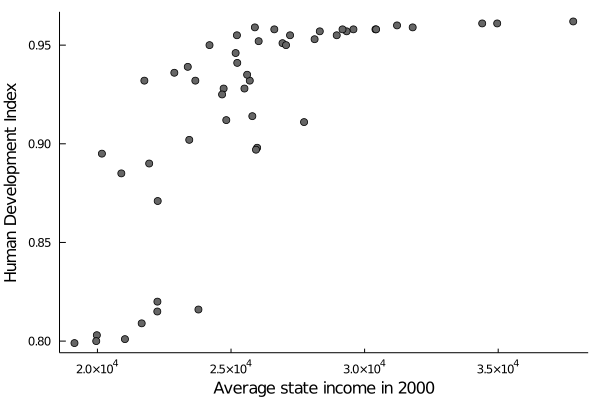

In [5]:
@df hdi_joined scatter(
    :st_income, :hdi,
    legend=false, grid=false,
    ylabel="Human Development Index",
    xlabel="Average state income in 2000",
    markercolor=:grey40
)

### Plot rank of average state income and Human Development Index

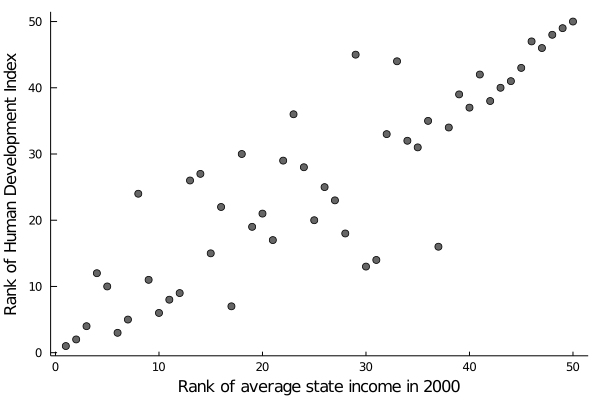

In [6]:
# Probably a cleaner way to do this
hdi_sorted = sort(hdi_joined, :hdi)
hdi_sorted[!,"hdi_ranking"] = 1:nrow(hdi_sorted)
inc_sorted = sort(hdi_sorted, :st_income)
inc_sorted[!,"inc_ranking"] = 1:nrow(inc_sorted)

@df inc_sorted scatter(
    :inc_ranking, :hdi_ranking,
    legend=false, grid=false,
    ylabel="Rank of Human Development Index",
    xlabel="Rank of average state income in 2000",
    markercolor=:grey40    
)

In [7]:
round(
    cor(inc_sorted.hdi_ranking, inc_sorted.inc_ranking),
    digits=2
)

0.86

### Plot a map of Human Devlopment index

TODO: Could use [GeoMakie](https://github.com/JuliaPlots/GeoMakie.jl)